2018 BRFSS Survey Data prepared by CDC

In [427]:
import pandas as pd

df_initial = pd.read_csv("project-2018-BRFSS-arthritis.csv")

/tmp/ipykernel_3380/3583986020.py:3: DtypeWarning: Columns (8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_initial = pd.read_csv("project-2018-BRFSS-arthritis.csv")


## Panadas profiling

In [428]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df_initial, title="Pandas Profiling Report")
# profile.to_file("initial_report.html")

## data frame info

In [429]:
print("Tuples (data pints: ", len(df_initial))
print("Attributes(variables: ", len(df_initial.columns))
print("All of the attributes are already numeric", len(df_initial.select_dtypes(exclude = ['object'])))


Tuples (data pints:  11933
Attributes(variables:  108
All of the attributes are already numeric 11933


In [430]:
# #df_initial.info(verbose = True, null_counts = False)
# print(pd.unique(df_initial['x.aidtst3']))
# print(df_initial['x.aidtst3'].value_counts())
# df_initial.iloc[:, :1].describe(include="all")

In [431]:
print("there are ", len(df_initial.select_dtypes(exclude='number').columns), " categorical attributes")
df_initial.select_dtypes(exclude='number').columns

there are  37  categorical attributes


Index(['x.aidtst3', 'employ1', 'income2', 'weight2', 'height3', 'children',
       'veteran3', 'blind', 'renthom1', 'marital', 'educa', 'deaf', 'decide',
       'flushot6', 'seatbelt', 'hivtst6', 'hivrisk5', 'pneuvac4', 'alcday5',
       'diffwalk', 'usenow3', 'diffdres', 'diffalon', 'smoke100', 'persdoc2',
       'medcost', 'checkup1', 'x.metstat', 'htin4', 'wtkg3', 'x.bmi5',
       'x.bmi5cat', 'htm4', 'x.race.g1', 'x.urbstat', 'x.chispnc', 'x.michd'],
      dtype='object')

In [432]:
my_data = df_initial[df_initial[ 'weight2'] != "?"]
my_data["weight2"]= my_data["weight2"].apply(pd.to_numeric)
my_data_male= my_data[my_data["sex1"]==1]
my_data_female= my_data[my_data["sex1"]==2]
my_data_male.weight2.describe()

/tmp/ipykernel_3380/905674552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data["weight2"]= my_data["weight2"].apply(pd.to_numeric)


count    5382.000000
mean      402.291156
std      1326.821010
min        51.000000
25%       170.000000
50%       192.000000
75%       225.000000
max      9999.000000
Name: weight2, dtype: float64

In [433]:
#print(IQR_outliers_low.index[1])
#new_df_num.drop(IQR_outliers_low.index[0],inplace = True )
#new_df_num.drop(IQR_outliers_low.index[1],inplace = True )
q_low = my_data_male[ 'weight2'].quantile(0.25)
q_hi  = my_data_male[ 'weight2'].quantile(0.90)
my_data_male = my_data_male[(my_data_male[ 'weight2'] < q_hi) & (my_data_male[ 'weight2'] > q_low)]



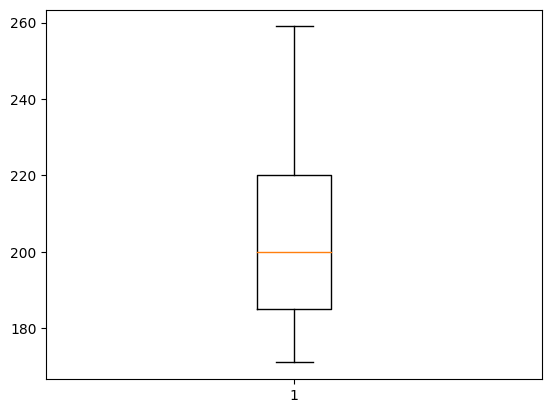

<Figure size 1000x700 with 0 Axes>

In [434]:
import matplotlib.pyplot as plt
plt.boxplot(df_filtered.weight2)
fig = plt.figure(figsize =(10, 7))
plt.show()

int64


<AxesSubplot: >

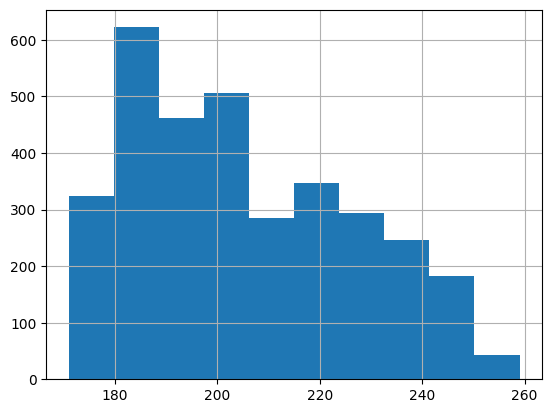

In [435]:
print(my_data_male.weight2.dtype)

my_data_male.weight2.hist()

In [436]:
my_data_male.weight2.mean()
my_data_male.weight2.median()
my_data_male.weight2.mode()

0    200
Name: weight2, dtype: int64

In [437]:
# df_initial.loc[((df_initial["weight2"]=="?")& (df_initial["sex1"]=="1"))]=my_data_male.weight2.mode()
# df_initial[df_initial.sex1==1].loc[(df_initial['weight2'] =="?")] = my_data_male.weight2.mode()

#df_initial[(df_initial[ 'weight2'] == "?")& ( df_initial["sex1"]==1)].weight2.replace(to_replace="?", value=200, inplace=True)
df_initial.loc[(df_initial[ 'weight2'] == "?")& ( df_initial["sex1"]==1), "weight2"]= 200

In [438]:
low = my_data_female[ 'weight2'].quantile(0.25)
hi  = my_data_female[ 'weight2'].quantile(0.75)
my_data_female = my_data_female[(my_data_female[ 'weight2'] < hi) & (my_data_female[ 'weight2'] > low)]


In [439]:
print("mean: ",
my_data_female.weight2.mean(), "median: ",
my_data_female.weight2.median(), "mode: ",
my_data_female.weight2.mode())

mean:  162.90718372536554 median:  160.0 mode:  0    150
Name: weight2, dtype: int64


<AxesSubplot: >

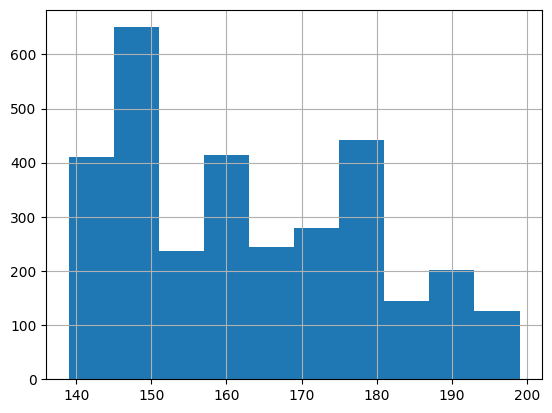

In [440]:
my_data_female.weight2.hist()

In [441]:

df_initial[(df_initial[ 'weight2'] == "?")& ( df_initial["sex1"]==2)].replace(to_replace="?", value=my_data_female.weight2.median(),  inplace=True)


/tmp/ipykernel_3380/3590745852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial[(df_initial[ 'weight2'] == "?")& ( df_initial["sex1"]==2)].replace(to_replace="?", value=my_data_female.weight2.median(),  inplace=True)


In [442]:
df_initial.loc[(df_initial[ 'weight2'] == "?")& ( df_initial["sex1"].isin([2,7,9])), "weight2"]= my_data_female.weight2.median()
df_initial["weight2"]= df_initial.weight2.astype('int')
df_initial.loc[(df_initial[ 'weight2'] > 600)& ( df_initial["sex1"]==2), "weight2"]= my_data_female.weight2.median()
df_initial.loc[(df_initial[ 'weight2'] <= 50)& ( df_initial["sex1"]==2), "weight2"]= my_data_female.weight2.median()
df_initial.loc[(df_initial[ 'weight2'] > 600)& ( df_initial["sex1"]==1), "weight2"]= my_data_male.weight2.median()
df_initial.loc[(df_initial[ 'weight2'] <= 50)& ( df_initial["sex1"]==1), "weight2"]= my_data_male.weight2.median()

In [465]:
# step 1
def filtered_data(df, column, gender):
    my_data = df[df[column] != "?"]
    my_data[column]= my_data["weight2"].apply(pd.to_numeric)
    if gender== "y":
        my_data_male= my_data[my_data["sex1"]==1]
        my_data_female= my_data[my_data["sex1"]==2]
        return my_data_male, my_data_female
    else:
        return my_data

In [466]:
# step 2
def outliers(data):
    lower = data[ 'weight2'].quantile(0.25)
    higher  = data[ 'weight2'].quantile(0.75)
    new_df = data[(data[ 'weight2'] < higher) & (data[ 'weight2'] > lower)]
    return new_df


In [479]:
# step 3
from scipy.stats import skew
def filling_value(df, column):
    val = skew(df[column], axis=0, bias=True)
    if val == 0:
        return df[column].mean()
    else:
        return df[column].median()

In [487]:
#step4
def adjusted_df(df,m,val, val1, val2):
    new_df = df
    if m ==0:
        new_df.loc[(df_initial[ 'weight2'] == "?"), "weight2"]= val
    else:
        new_df.loc[(new_df[ 'weight2'] == "?")& ( new_df["sex1"].isin([1])), "weight2"] = int(val1)
        new_df.loc[(new_df[ 'weight2'] == "?")& ( new_df["sex1"].isin([2,7,9])), "weight2"]= int(val2)
    return new_df
        

In [488]:
testing_df = pd.read_csv("project-2018-BRFSS-arthritis.csv")

my_data_male, my_data_female = filtered_data(df=testing_df, column="weight2", gender="y")
val1= filling_value(df=outliers(my_data_male), column="weight2")
val2= filling_value(df=outliers(my_data_female), column="weight2")
val = filling_value(df=outliers(my_data), column="weight2")
df_1 = adjusted_df(df=testing_df,m=1, val1=val1, val2=val2, val=0)
df_1.head(n=22)

/tmp/ipykernel_3380/3237536970.py:1: DtypeWarning: Columns (8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  testing_df = pd.read_csv("project-2018-BRFSS-arthritis.csv")
/tmp/ipykernel_3380/1716805926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data[column]= my_data["weight2"].apply(pd.to_numeric)


,x.aidtst3,employ1,income2,weight2,height3,children,veteran3,blind,renthom1,sex1,...,x.denvst3,x.prace1,x.mrace1,x.exteth3,x.asthms1,x.michd,x.ltasth1,x.casthm1,x.state,havarth3
0,2,1,8,138,504,2,2,2,1,2,...,1,1,1,1,3,2,1,1,27,2
1,1,1,4,240,600,88,2,1,2,1,...,2,1,1,2,3,2,1,1,72,2
2,1,1,6,120,504,88,2,2,1,2,...,1,6,6,2,3,2,1,1,31,2
3,2,7,77,133,502,88,2,2,1,2,...,1,1,1,2,3,2,1,1,45,2
4,9,7,8,170,505,88,2,2,1,2,...,1,1,1,1,3,2,1,1,24,2
5,2,1,5,192,601,88,2,2,2,1,...,1,1,1,1,3,2,1,1,19,2
6,1,1,7,205,511,88,1,2,1,1,...,1,1,1,1,3,2,1,1,1,2
7,1,2,8,220,508,88,2,2,1,1,...,2,1,1,2,3,2,1,1,51,2
8,2,1,6,200,601,2,2,2,1,1,...,2,1,1,1,3,2,1,1,55,2
9,1,2,8,200,507,88,2,2,1,1,...,1,1,1,2,3,1,1,1,48,2


In [523]:

def filtered_data(df, column, gender):
    my_data = df[df[column] != "?"]
    my_data[column]= my_data[column].apply(pd.to_numeric)
    if gender== "y":
        my_data_male= my_data[my_data["sex1"]==1]
        my_data_female= my_data[my_data["sex1"]==2]
        m=0
        # setting m to one for the function below
        return my_data_male, my_data_female
    else:
        return my_data

def outliers(data, column):
    lower = data[ column].quantile(0.25)
    higher  = data[ column].quantile(0.75)
    new_df = data[(data[ column] < higher) & (data[ column] > lower)]
    return new_df
def filling_value(df, column):
    val = skew(df[column], axis=0, bias=True)
    if val == 0:
        return df[column].mean()
    else:
        return df[column].median()
def adjusted_df(df,m,val, val1, val2, column):
    new_df = df
    if m ==0:
        new_df.loc[(df_initial[ column] == "?"), column]= val
    else:
        new_df.loc[(new_df[ column] == "?")& ( new_df["sex1"].isin([1])), column] = int(val1)
        new_df.loc[(new_df[ column] == "?")& ( new_df["sex1"].isin([2,7,9])), column]= int(val2)
    return new_df

def main(df, column, gender):
    if gender != "y":
        data =filtered_data(df=df, column=column, gender=gender)
        val = filling_value(df=outliers(data, column= column), column=column)
        print("filed value", val)
        val1=0
        val2=0
        df_1 = adjusted_df(df=df,m=0, val1=val1, val2=val2, val=val, column=column)
        return df_1

    else:
        my_data_male, my_data_female = filtered_data(df, column, gender)
        val1= filling_value(df=outliers(my_data_male, column= column), column=column)
        val2= filling_value(df=outliers(my_data_female, column= column), column=column)
        val=0
        df_1 = adjusted_df(df=df,m=1, val1=val1, val2=val2, val=val, column=column)
        return df_1      

In [524]:
my_test_df = main(df=testing_df, gender="y", column="weight2")
my_test_df_2= main(df=my_test_df, gender="y", column= 'height3')
my_test_df_3= main(df=my_test_df, gender=0, column= 'children')

filed value 6.0


In [582]:
test = testing_df.replace("?",  None)

empty_cells_dropped = test.dropna()
print(len(empty_cells_dropped))

7646


In [557]:
test_missing = test.isna()
test_missing_sum = test_missing.sum()

In [571]:
n= test_missing_sum/ len(test) *100
k =test.isna().mean().round(4)*100

In [583]:
number = len(test.columns)
print(number)
discrip= test.isnull().sum(axis=1)/number 

108
